In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

# STEP 1 - Import data and get all necessary descriptions from data like its shape, statistical descriptions and such
# There are two dataframes. The train data set and test data set. Usually when there's no test data set, we take 20 % from the train. We modify train first

df_train = pd.read_csv(r'C:/Users/kgonzales21/Downloads/IE things/IE things/'\
                       'Datasets/House Price Prediction/train.csv')
df_test = pd.read_csv(r'C:/Users/kgonzales21/Downloads/IE things/IE things/'\
                      'Datasets/House Price Prediction/test.csv')

# Inspect Data

In [135]:
df_train.shape # with SalePrice

(1460, 81)

In [136]:
df_test.shape # without SalePrice

(1459, 80)

In [137]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [138]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [139]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Distribution of the Label data

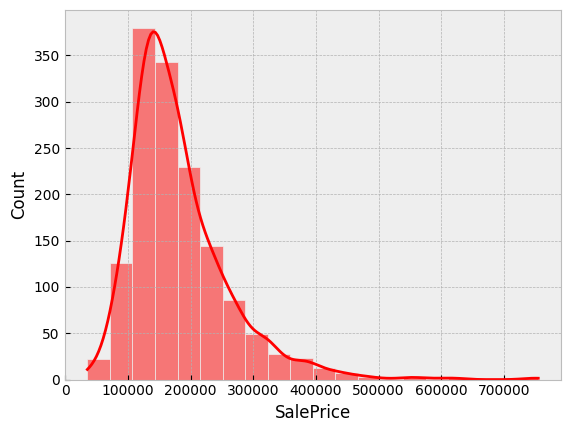

In [140]:
sns.histplot(
    data=df_train['SalePrice'], # all unique values of the variable species 
    weights=None,
    bins=20,
    binwidth=None,
    binrange=None,
    discrete=False,
    cumulative=False,
    multiple="layer",
    element="bars",
    fill=True,
    shrink=1,
    kde=True,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette="Set2",
    hue_order=None,
    hue_norm=None,
    color="red",
    log_scale=False,
    legend=True,
    ax=None
)

plt.show()

# Inspect Features data types

In [141]:
# STEP 2 - Identify if there are categorical data in your dataframe. We must separate numerical data from categorical data
# we are given with int, float and 0. We separate the 0 data columns (categorical) to the int and floaat (numerical)

set(df_train.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

# Get continuous features

In [142]:
# drops the ID column because it is not part of data analysis

df_train = df_train.drop(labels=["Id"], axis=1)
df_numerical = df_train.select_dtypes(include=['int64','float64'])
df_numerical

# we have 37/81 columns of numerical data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


# Correlation of continuous features

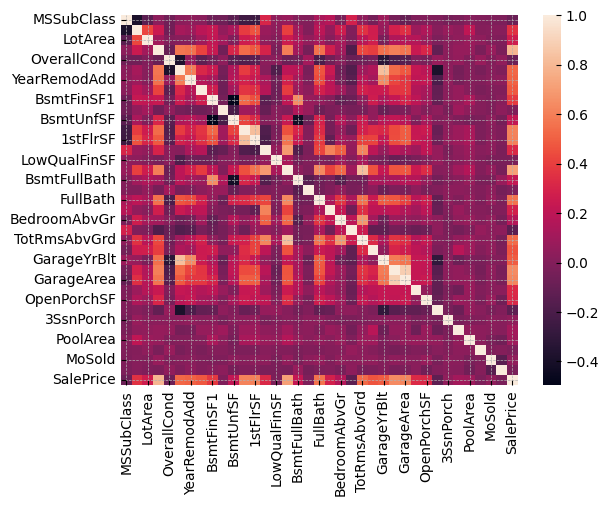

In [143]:
# STEP 3 - find correlataion between numerical data

corrmat = df_numerical.corr() #determines correlation
g = sns.heatmap(df_numerical.corr()) #visualizes correlation

# Our dependent variable is sales. Say we want only those varaiables who have a 55% and higher correlation with sales. We select them from the bunch

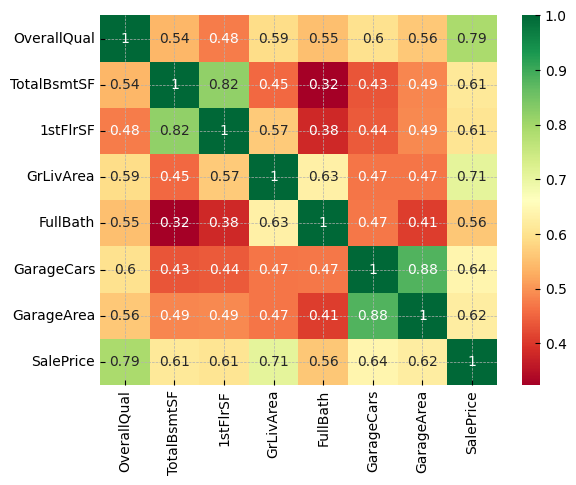

In [144]:
T_corr = corrmat.index[abs(corrmat['SalePrice']) > 0.55]
g = sns.heatmap(df_numerical[T_corr].corr(), annot=True, cmap="RdYlGn")

# we conclude that overall quality, Total BS, 1stFIR, GrLiv, Garage cars, and Garage area affects the Sales

# Get discrete features

In [164]:
# STEP 4 - Categorical variables

df_cat = df_train.select_dtypes(include=['O']) # shows the columns with data type 0 (categorical)
df_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1451,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1452,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


# Remove outliers

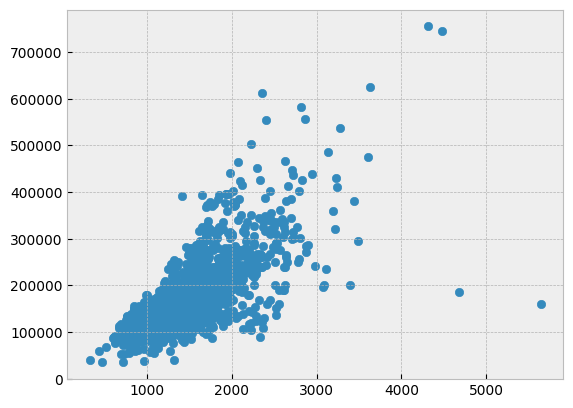

In [146]:
# STEP 5 - Finding and removing outliers visually

plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.show()

# Going back, we knew that only a number of variables are affeecting sales, so we focus on them. We scatter plot them with sales individually to determine outliers
# Notice that outliers are those values beyond 4000, thus we remove them. Also in this case, we don't remove thoses that are higher than 700k. Thus our parameters are those outliers higher than 4000, and lesser than 300k

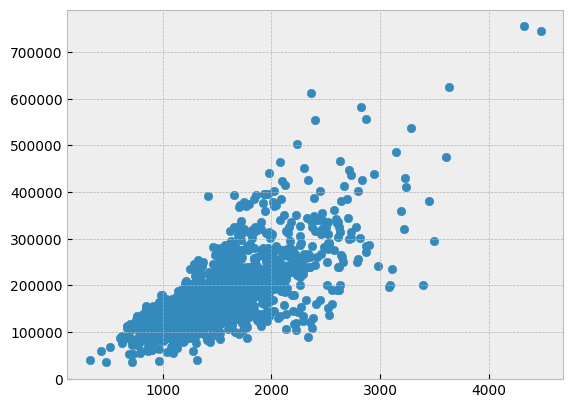

In [147]:
# STEP 5.1 - Remove outliers

df_train = df_train.drop(df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice']<300000)].index)
df_train = df_train.reset_index()

plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.show()

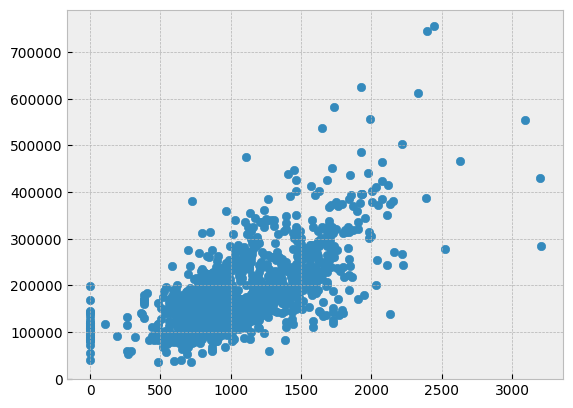

In [148]:
plt.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.show()

# outliers beyond 3000

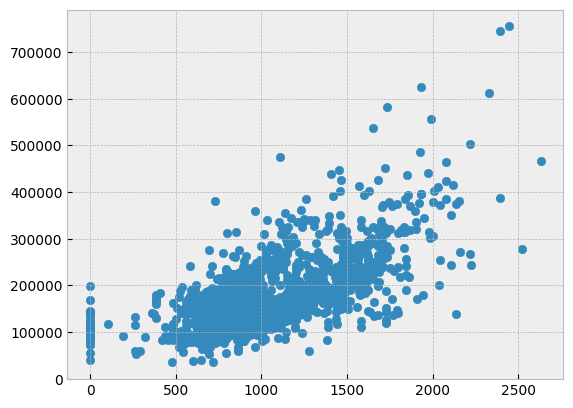

In [149]:
df_train = df_train.drop(df_train[df_train.TotalBsmtSF > 3000].index) # removing outliers without Y parameters
df_train = df_train.reset_index()

plt.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.show()

In [150]:
df_numerical.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Data Visualization

In [152]:
num_cols = ['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']
cat_cols = ['OverallQual', 'FullBath', 'GarageCars',]

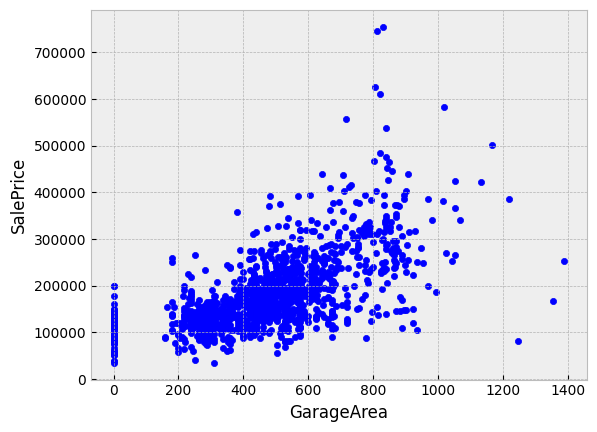

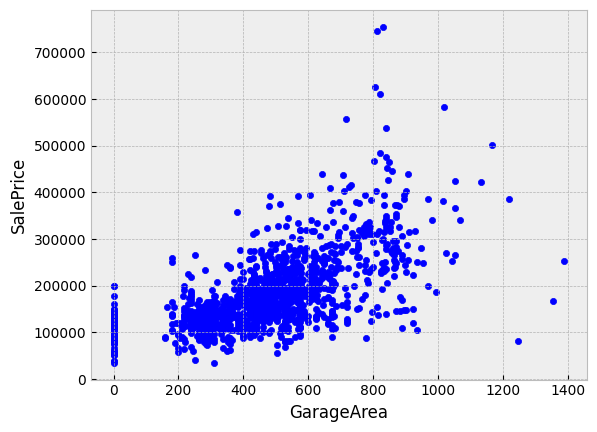

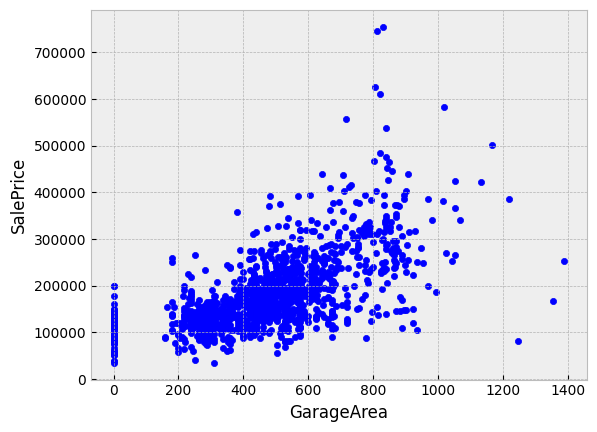

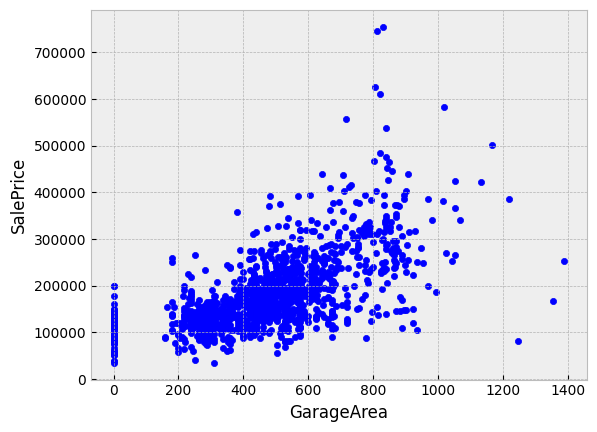

In [ ]:
for col in num_cols:
    scatter_plots = df_train.plot(kind="scatter", x=col, y= 'SalePrice')
    scatter_plots

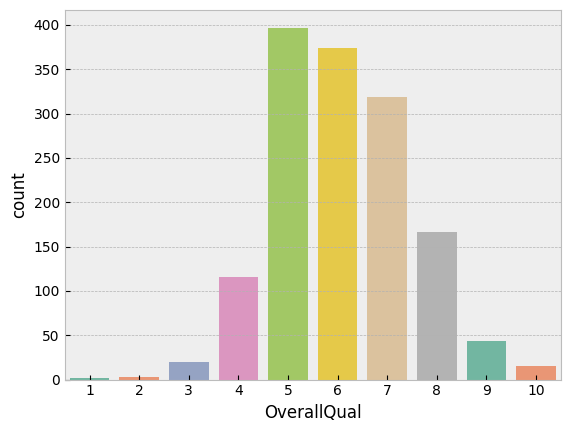

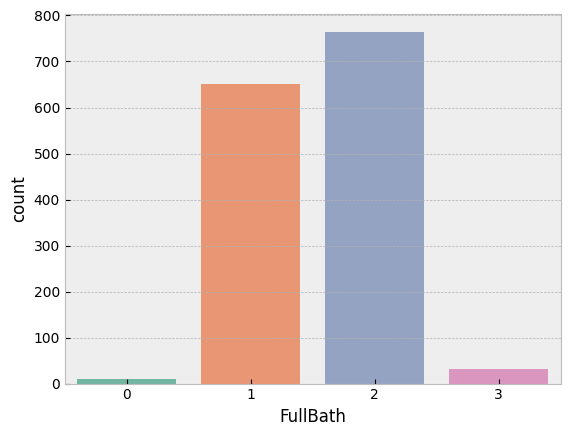

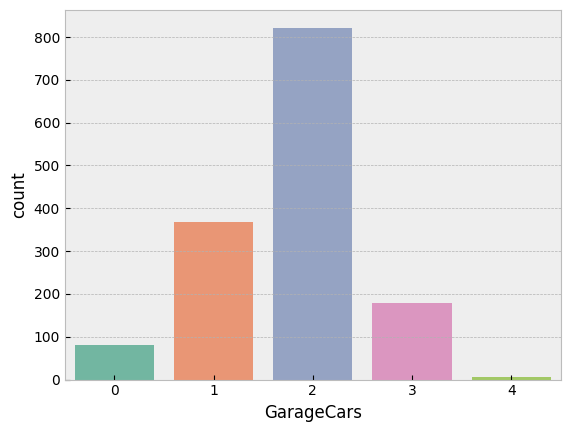

In [154]:
for col in cat_cols:
    sns.countplot(data=df_train, x=col, palette="Set2")
    plt.show()

# Select conitnuous features with correlation > 55%

In [155]:
df_train_corr = corrmat.index[abs(corrmat['SalePrice']) > 0.55]
np.array(df_train_corr) # continuous features that have > 55% correlation with SalePrice

array(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea', 'SalePrice'], dtype=object)

# Handle missing values

In [156]:
# STEP 6 - Removing / handle missing values

missing_train = df_train.isnull().sum().sort_values(ascending=False) # shows how  many null values in each column
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False) # percent of each each total of null values per column
missing_data_train = pd.concat([missing_train, percent], axis=1, keys=['missing','percent']) # joins missing_train and percent
missing_data_train.head(20)

# we can see that the first six have the most missing values ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu','LotFrontage']

,missing,percent
PoolQC,1449,0.995876
MiscFeature,1401,0.962887
Alley,1364,0.937457
Fence,1174,0.806873
MasVnrType,871,0.598625
FireplaceQu,690,0.474227
LotFrontage,258,0.177320
GarageType,81,0.055670
GarageQual,81,0.055670
GarageFinish,81,0.055670


In [157]:
df_train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu','LotFrontage'], 
              inplace=True) # drops all those columns with many null values

In [158]:
df_train.shape # our train data has originally 79 columns. We are left with 76 columns having dropped 6 columns

(1455, 76)

# Test Data

In [159]:
# STEP 7 - Test data
# how many null values in each columns

missing_test = df_test.isnull().sum().sort_values(ascending=False)
percent_test = (df_test.isnull().sum() / df_test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([missing_test, percent], axis=1, keys=['missing1', 'percent1'])
missing_data_test.head(25)

,missing1,percent1
PoolQC,1456.0,0.995876
MiscFeature,1408.0,0.962887
Alley,1352.0,0.937457
Fence,1169.0,0.806873
MasVnrType,894.0,0.598625
FireplaceQu,730.0,0.474227
LotFrontage,227.0,0.177320
GarageYrBlt,78.0,0.055670
GarageCond,78.0,0.055670
GarageFinish,78.0,0.055670


In [160]:
# drop columns with more than 100 numbers of null values

df_test.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu','LotFrontage'], 
                            inplace=True)

In [161]:
df_test.shape

(1459, 74)

In [162]:
print(df_train.shape, df_test.shape)

(1455, 76) (1459, 74)


In [ ]:
# fill gaps
df_train.fillna(method ='ffill', inplace=True)
df_test.fillna(method ='ffill', inplace=True)

In [165]:
# STEP 8 - coding categorical variables in train data

df_cat = df_train.select_dtypes(include=['O'])
df_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1451,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1452,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [166]:
df_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [167]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat_encoded = df_cat.apply(le.fit_transform) 
df_cat_encoded

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1451,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1452,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4
1453,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,2,4,4,2,8,4


In [168]:
df_numerical = df_train.select_dtypes(include=['int64', 'float64'])
df_numerical

,level_0,index,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,60,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,1,1,20,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,2,2,60,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,3,3,70,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,4,4,60,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1453,1455,60,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1451,1454,1456,20,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1452,1455,1457,70,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1453,1456,1458,20,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [169]:
print(df_numerical.shape, df_cat.shape)

(1455, 38) (1455, 38)


In [171]:
# STEP 9 - concat numerical and categorical data in train data

final_test = pd.concat([df_cat_encoded, df_numerical], axis=1)
final_test

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,0,61,0,0,0,0,0,2,2008,208500
1,3,1,3,3,0,2,0,24,1,2,...,298,0,0,0,0,0,0,5,2007,181500
2,3,1,0,3,0,4,0,5,2,2,...,0,42,0,0,0,0,0,9,2008,223500
3,3,1,0,3,0,0,0,6,2,2,...,0,35,272,0,0,0,0,2,2006,140000
4,3,1,0,3,0,2,0,15,2,2,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,3,1,3,3,0,4,0,8,2,2,...,0,40,0,0,0,0,0,8,2007,175000
1451,3,1,3,3,0,4,0,14,2,2,...,349,0,0,0,0,0,0,2,2010,210000
1452,3,1,3,3,0,4,0,6,2,2,...,0,60,0,0,0,0,2500,5,2010,266500
1453,3,1,3,3,0,4,0,12,2,2,...,366,0,112,0,0,0,0,4,2010,142125


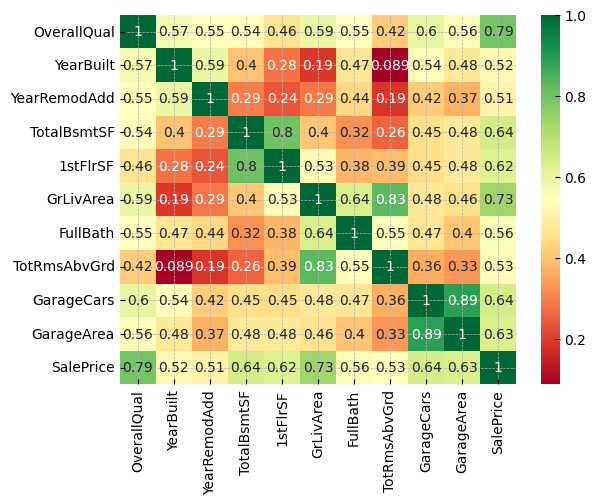

In [172]:
# STEP 10 - Correlation of new data (data with numerical and encoded categories)
# In this case, there is a condition of 50% and higher correlation

corrmat1 = final_test.corr()
T1_corr = corrmat.index[abs(corrmat['SalePrice']) > 0.5]
g1 = sns.heatmap(final_test[T1_corr].corr(), annot=True, cmap="RdYlGn")

In [ ]:
# STEP 11 - Regression analysis

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#separates x and y of train data
x = final_test.iloc[:, :-1] # from column 1 to last column-1
y = final_test.iloc[:, -1] # last column
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=44, shuffle =True) # separates 20% of train data and made it test data

# X_train= 80% of the train data
# X_test+ 20% of the train data
# y_train= 80% of the train data to predict
# y_test= 20% of the train data to predict

LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test)) # linear model of 20%

Linear Regression Train Score is :  0.8952549054034442
Linear Regression Test Score is :  0.9049580298321244


In [174]:
# df_train data

X_test.shape + X_train.shape

# 291+1164= number of original rows, still 73 columns

(291, 75, 1164, 75)

In [ ]:
# Prediction proper
# Predicts test data (20%) of train data

y_pred_linear = LinearRegressionModel.predict(X_test) #291 X_test, 20%
y_pred_linear

array([153639.32371676, 118960.81507876, 183595.77489679, 205137.47620652,
       151916.82239525, 145342.77880936, 132394.90464762, 164601.1035164 ,
       178900.26798837, 189175.75962293, 272538.18141347, 195200.20715394,
        86025.06752478, 279939.89933423, 170297.51551908, 179306.36727286,
       155585.87911551, 222485.07124139, 110001.5828703 , 164712.62726831,
       331014.7397676 , 165865.80213476, 296521.89051188, 194910.06667576,
       100517.82021482, 174365.60007669, 171225.44314909, 109278.7832612 ,
       189773.11530092, 208810.79921974,  56456.25188267, 150239.86702771,
       137496.016183  , 175347.61464418, 268201.84339352, 197533.64568886,
       231674.13763013, 283247.70204978, 121850.5707923 , 164686.08464563,
       233262.67059292, 263165.65169896, 155318.25956598, 328368.90202111,
       280062.8732335 , 130030.17825818, 130165.69039774,  86461.88254543,
       198120.5928999 , 137037.67196452, 168455.49787961, 133434.65288696,
       250526.05704963, 1